# LeNet-5 Implementation for Handwritten Digit Recognition on MNIST



## Introduction
### Brief Introduction to Convolutional Neural Networks(CNNs)
Convolutional Neural Networks (CNNs) are a class of deep neural networks highly effective for analyzing visual imagery. They employ a mathematical operation called convolution and have been successful in various tasks such as image and video recognition.
### Overview of the LeNet-5 architecture
LeNet-5, introduced by Yann LeCun et al. in 1998, is one of the earliest CNNs and has significantly influenced the design of subsequent deep learning architectures. Its design is straightforward yet powerful, consisting of convolutional layers, pooling layers, and fully connected layers, specifically tailored for digit recognition tasks.
### Significance of the MNIST dataset in machine learning
The MNIST dataset, consisting of 70,000 handwritten digits, is a staple in machine learning for benchmarking image processing systems. Due to its clarity and preprocessed state, it is widely used for training and testing in the field of machine learning, serving as a common starting point for testing algorithms like LeNet-5.

## Setup and Configuration

The environment is configured properly to leverage high computational efficiency and ensure all necessary libraries are available.

### Environment Setup
If using Google Colab, it is advisable to use a GPU runtime used to speed up the training process.

This is set by navigating to `Runtime` > `Change runtime type` and selecting 'GPU' from the hardware accelerator dropdown menu. While it is possible to run the training on a CPU, using a GPU significantly decreases the model training time, making it highly recommended for efficiency. However, for small-scale experiments or when GPU resources are not available, a CPU suffices, but be prepared for slower processing speeds.

### Library Imports
Import Python libraries fundamental for the project

In [17]:
# Import necessary libraries

# TensorFlow for building the LeNet-5 model
import tensorflow as tf

# Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit learn's confusion matrix for evaluating the accuracy of the classification
from sklearn.metrics import confusion_matrix

# Additional imports for array-handling
import pandas as pd
import numpy as np

# Print TensorFlow version to ensure it's the GPU-compatible version
print(tf.__version__)

2.15.0


## Data Preprocessing

The MNIST dataset is prepared for training the LeNet-5 model by loading the dataset, visualizing the data, normalizing, and reshaping it. These steps are critical to ensure that the data is in the appropriate format for feeding into a convolutional neural network.

### Loading the MNIST Dataset

In [18]:
# Import the MNIST dataset from TensorFlow's Keras datasets module.
mnist_dataset = tf.keras.datasets.mnist
# Load the MNIST dataset.
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
# Print the shape of the training data.
print("Training data shape:", x_train.shape, y_train.shape)
# Print the shape of the test data.
print("Test data shape:", x_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


The dataset consists of 60,000 training images and 10,000 test images of handwritten digits, each image being 28x28 pixels.


### Visualize the Data

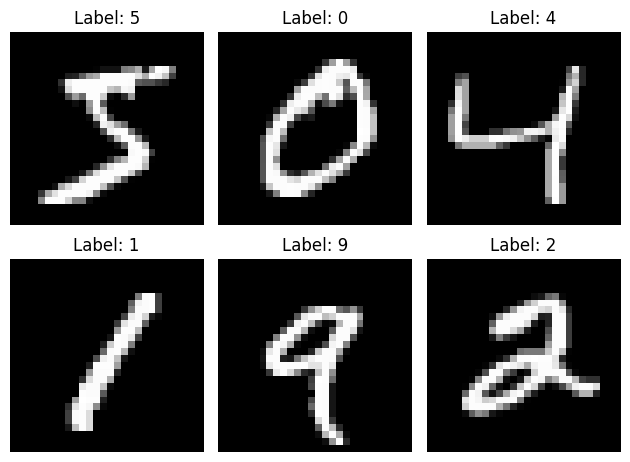

In [19]:
# plot the first 6 images in the dataset
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.title(f'Label: {y_train[i]}')
  plt.axis('off')

plt.tight_layout()
plt.show()

### Normalize and Reshape the Data

To prepare images for a network like LeNet, which requires 32x32 pixel inputs, two preprocessing steps are necessary: normalization and padding.

**Normalize Pixel Values**: Normalization adjusts the pixel values to a similar scale, often improving the convergence speed of training the neural network. For images, pixel values typically range from 0 to 255 (for 8-bit grayscale images). A common approach is to scale these values to a range of 0 to 1. The normalization formula used here is:

Normalized Value = Pixel Value / 255.

**Pad the Images from 28x28 to 32x32**: Padding is required when the input images are smaller than the neural network’s required input size. For LeNet, which expects 32x32 images, a border of pixels is added around the original 28x28 images. Typically, 2 pixels of padding are added on all sides, resulting in a 32x32 image. This padding is often zero-padding, which does not add any additional information to the input but is common due to its simplicity.

**Padding Details**:
- **Top and Bottom**: 2 rows of zeros are added to each.
- **Left and Right**: 2 columns of zeros are added to each.

In [20]:
def preprocess_images(images):
    # Reshape the images to add a channel dimension (60000, 28, 28) -> (60000, 28, 28, 1)
    images = images.reshape((-1, 28, 28, 1))

    # Normalize pixel values to 0-1 for the whole batch
    normalized_images = images / 255.0

    # Pad each image in the batch from 28x28 to 32x32
    # Specify padding for the second and third dimensions (height and width)
    padded_images = np.pad(normalized_images, pad_width=((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant', constant_values=0)

    return padded_images

X_train_preprocessed = preprocess_images(x_train)
X_test_preprocessed = preprocess_images(x_test)
print("Processed x_train Shape:", X_train_preprocessed.shape)
print("Processed x_test Shape:", X_test_preprocessed.shape)

Processed x_train Shape: (60000, 32, 32, 1)
Processed x_test Shape: (10000, 32, 32, 1)


## Model Building

In this section, the LeNet-5 architecture is constructed, one of the earliest and most influential convolutional neural networks, specifically designed for handwritten digit recognition. This architecture comprises alternating layers of convolutional and subsampling (pooling) layers, followed by fully connected layers.

### LeNet-5 Architecture Details

**Convolutional Layers**: The LeNet-5 architecture includes multiple convolutional layers, which apply various filters to the input to create feature maps. These maps highlight essential features in the images, such as edges and corners, which are crucial for understanding and recognizing patterns.

**Subsampling (Pooling) Layers**: Following each convolutional layer, subsampling (also known as pooling) layers are employed to reduce the spatial dimensions (width and height) of the input volume for the next convolutional layer. This reduction simplifies the information, allowing the network to focus on significant features while reducing computational complexity.

**Fully Connected Layers**: Towards the end of the architecture, LeNet-5 utilizes fully connected layers, where neurons are fully connected to all activations in the previous layer. These layers, typically dense, integrate learned features from the prior layers, which are then used to classify the input into various classes based on the training dataset.

In [21]:
# Define the Sequential model
model = tf.keras.Sequential([

    # First Conv2D layer
    tf.keras.layers.Conv2D(
        filters=6,  # Number of filters
        kernel_size=(5, 5),  # Size of each filter is 5x5
        padding="valid",  # No padding is applied to the input
        activation=tf.nn.relu,  # ReLU activation function
        input_shape=(32, 32, 1)  # Input shape of each image is 32x32 with 1 color channel
    ),

    # First pooling layer
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2
    ),

    # Second Conv2D layer
    tf.keras.layers.Conv2D(
        filters=16,  # Number of filters
        kernel_size=(5, 5),  # Size of each filter is 5x5
        padding="valid",  # No padding is applied to the input
        activation=tf.nn.relu,  # ReLU activation function
        input_shape=(32, 32, 1)  # Input shape of each image is 32x32 with 1 color channel
    ),

     # Second pooling layer
     tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2
    ),

    # Flatten the output for the Dense layer
    tf.keras.layers.Flatten(),

    # Fully connected layer 1
    tf.keras.layers.Dense(120, activation=tf.nn.relu),

    # Fully connected layer 2
    tf.keras.layers.Dense(84, activation=tf.nn.relu),

    # # Output layer for 10 classes
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

## Training the Model
In this section, the LeNet-5 model is trained using the preprocessed MNIST dataset. Training a neural network involves defining the optimizer, loss function, and metrics, followed by iterating over the training data.



### Compilation of the Model

Initially, the model must be compiled, specifying the optimizer, loss function, and metrics to be tracked.

In [22]:
model.compile(
    optimizer='adam',  # Using Adam optimizer which is an extension to stochastic gradient descent
    loss='sparse_categorical_crossentropy',  # This loss is used for multi-class classification problems
    metrics=['accuracy']  # Monitoring accuracy during training
)

### Training Process

The model is trained using the fit method, which takes parameters such as training data, labels, number of epochs, batch size, and the fraction of data used for validation.

**Choosing the Batch Size and Number of Epochs:**

- **Batch Size**: A batch size of 32 is selected to balance computational efficiency and model performance accuracy. This size provides a good compromise by allowing frequent updates to the weights (which can be noisy with larger batches) and maintaining computational efficiency.
  
- **Number of Epochs**: Training is conducted for 10 epochs to ensure sufficient learning without excessive computational time. This duration also helps in preventing overfitting, particularly if training for too many epochs would lead to minimal improvements in validation accuracy.



In [23]:
history = model.fit(
    X_train_preprocessed, y_train,        # Training data and labels
    epochs=10,                            # Number of epochs to train for
    batch_size=32,                        # Batch size for training
    validation_split=0.2                  # Fraction of data to use for validation to monitor overfitting
)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2199 - accuracy: 0.9333 - val_loss: 0.0952 - val_accuracy: 0.9711
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0727 - accuracy: 0.9773 - val_loss: 0.0607 - val_accuracy: 0.9827
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0584 - val_accuracy: 0.9834
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0555 - val_accuracy: 0.9843
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.0566 - val_accuracy: 0.9832
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0272 - accuracy: 0.9907 - val_loss: 0.0567 - val_accuracy: 0.9841
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0221 - accuracy: 0.9924 - val_loss: 0.0574 - val_accuracy:

## Evaluation

After training, the next step is to evaluate the model's performance on a set of previously unseen data, which is the test set. This evaluation is essential to determine how well the model generalizes beyond the training data.

To evaluate the model, the `evaluate` method is used, which returns the loss value and metrics values for the model in test mode. The focus here will be on the test loss and test accuracy, providing a measure of the overall performance of the model.

In [24]:
test_loss, test_acc = model.evaluate(X_test_preprocessed, y_test, verbose=2)  # Evaluate the model

print('Final Test Loss:', test_loss)
print('Final Test Accuracy:', test_acc)


313/313 - 1s - loss: 0.0503 - accuracy: 0.9869 - 1s/epoch - 4ms/step
Final Test Loss: 0.050275810062885284
Final Test Accuracy: 0.9868999719619751


## Results Vizualization

Visualizing the results of training and validation is crucial for understanding the behavior of the model over the epochs. It helps in identifying patterns such as overfitting, underfitting, or whether the model has sufficiently learned from the training data.



### Plotting Accuracy

This plot displays the accuracy of the model on the training and validation datasets across each epoch. It is helpful to ensure that the model is not just memorizing the data but actually learning to generalize from it.

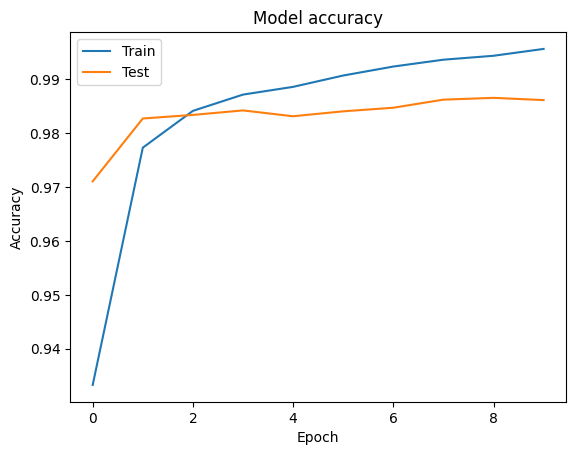

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Plotting Loss

The loss plots help to confirm whether the model is improving and minimizing its error across epochs. A diverging validation loss might indicate overfitting, particularly if the validation loss begins to increase while the training loss continues to decrease.

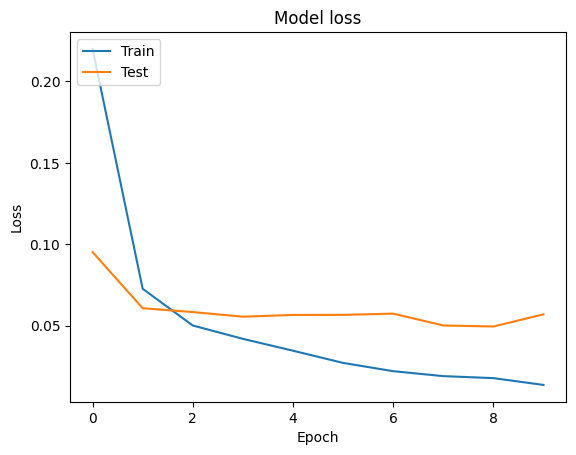

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix

This visualization will allow the assessment of how well the model performs for each digit in the MNIST dataset and can highlight any specific digits where the model may be confusing one for another.

313/313 [==============================] - 1s 3ms/step


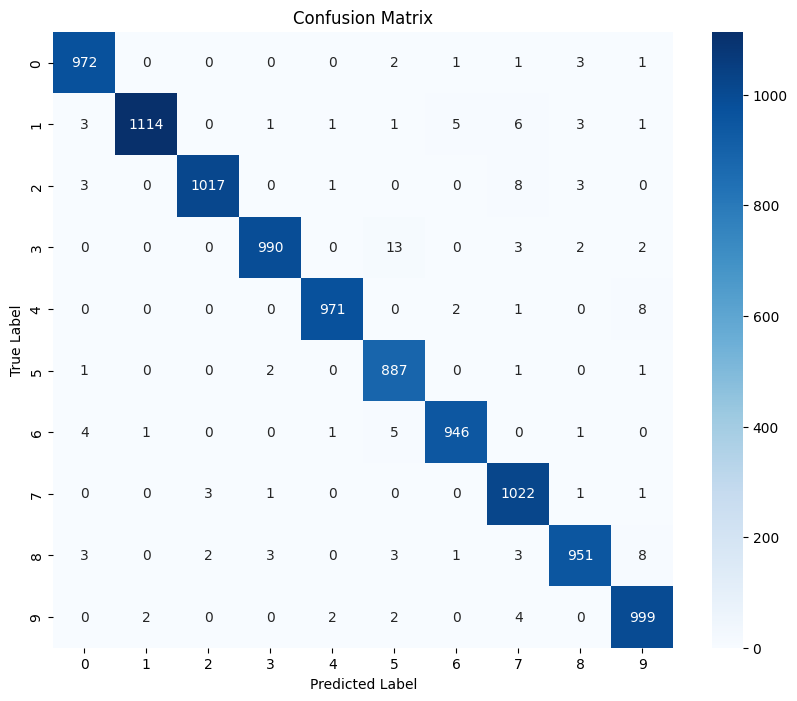

In [27]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test_preprocessed)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## Predictions

This step uses the trained model to make predictions on the test data. This will give a practical sense of how the model performs on individual examples.

The model's predictions alongside the actual labels will also be visualised to verify the results visually.

In [28]:
# Making predictions
predictions = model.predict(X_test_preprocessed)

# Select a few random test images and their corresponding labels from the dataset
num_images = 10
random_indeces = np.random.choice(X_test_preprocessed.shape[0], num_images)
sample_images = X_test_preprocessed[random_indeces]
sample_labels = y_test[random_indeces]
sample_predictions = predictions[random_indeces]

313/313 [==============================] - 1s 4ms/step


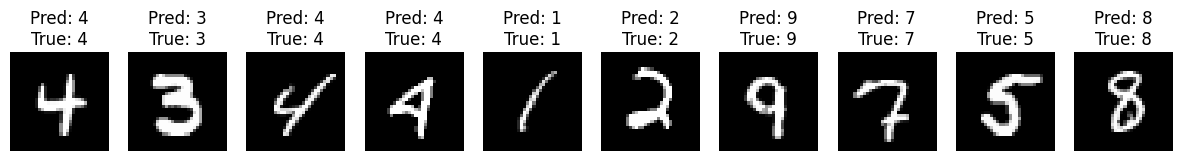

In [29]:

# Plot the random test images and their predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(np.squeeze(sample_images[i]), cmap='gray')
    plt.axis('off')
    # The predicted label is the index of the highest probability in the prediction vector
    predicted_label = np.argmax(sample_predictions[i])
    true_label = sample_labels[i]
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}")

plt.show()

## Conclusion

### Summary of Results
The model's accuracy and loss across training epochs show a steady improvement in training accuracy and a corresponding decrease in loss. The model achieves a remarkable test accuracy of approximately 98.73%, with a minimal loss value of 0.0532. The accuracy plot indicates that the model may not have reached its peak performance within the 10 epochs, as the validation accuracy continues to improve. The loss plot, however, shows a slight divergence in later epochs, suggesting that the model might begin to overfit if trained further without regularization or data augmentation.

The confusion matrix reveals that the model has excellent predictive capabilities across all digits, with particularly high performance on '1's and '0's. There is a small number of misclassifications, as seen in the off-diagonal elements of the matrix, but these are very low in comparison to the correct predictions.

### Performance of LeNet-5
The LeNet-5 model has performed exceptionally well, considering the complexity of the task and the variations in handwriting styles present in the MNIST dataset. The architecture, despite its age, proves to be quite powerful for the task of image classification, particularly with small, clean datasets like MNIST.

### Potential Improvements or Variations to Explore
- **Data Augmentation**: To make the model more robust against overfitting and improve its ability to generalize, data augmentation techniques such as rotations, scaling, or shifts can be applied to the MNIST images.
- **Hyperparameter Tuning**: Experimenting with different optimizers, learning rates, or regularization techniques could yield improvements in performance.
- **Model Enhancements**: While LeNet-5 is quite effective for MNIST, modern architectures like ResNet or Inception could be explored for more complex image datasets.
- **Transfer Learning**: Applying transfer learning by using pre-trained weights from models trained on more extensive datasets could provide a head start in learning features and potentially improve performance.
- **Ensemble Methods**: Combining the predictions of several models can often produce better results than any single model.
- **Explainability**: Employing model explainability tools to understand which features the model is focusing on could provide insights into the decision-making process of the network.

This project reinforces the capabilities of classical neural network architectures like LeNet-5 but also opens up several avenues for further exploration and improvement. With its solid performance on MNIST, the project lays the groundwork for tackling more complex image recognition tasks in the future.

## References

The development and evaluation of the LeNet-5 model on the MNIST dataset within this project were  inspired by foundational work in the field and educational resources. Below are the primary references:

1. **LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998).** Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278-2324.
   - This seminal paper by Yann LeCun et al. introduced the LeNet-5 architecture and has been a significant reference for understanding convolutional neural networks' application to image recognition tasks.

2. **Ng, A. (n.d.). Convolutional Neural Networks. Coursera.**
   - Andrew Ng's Coursera course specifically on Convolutional Neural Networks offers a deep dive into CNN architectures, including LeNet-5, and their use in image recognition.

For further reading and resources, the original paper by Yann LeCun et al. is highly recommended. It provides deep insights into the concepts behind convolutional neural networks and the specific architectural choices for LeNet-5. It also discusses the broader context of gradient-based learning applied to document recognition, which remains relevant to contemporary machine learning applications.

Additional Resources:
- TensorFlow Documentation: [https://www.tensorflow.org/](https://www.tensorflow.org/)
- Keras API Reference: [https://keras.io/api/](https://keras.io/api/)
- MNIST Dataset Information: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)